In [154]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def create_model_df(model_name):
    data_dir = os.path.join('..','group_evals','data')

    records = []
    for training_data_f in os.listdir(data_dir):
        if model_name not in training_data_f:
            continue
        h_type = training_data_f.split('_')[-2][-1]
        p_type = training_data_f.split('_')[-1].split('.')[0].split('p')[1]
        print(p_type)
        with open(os.path.join(data_dir, f'{model_name}_h{h_type}_p{p_type}.json')) as f:
            preds = json.load(f)

        true = np.load(os.path.join('..','splits','test',f'y_preprocessed_h{0}_p{0}.npy'))
        record = {
            'type' : model_name,
            'halflife' : h_type,
            'ignored_percent' : p_type,
            'true' : np.argmax(true,axis=1).astype(int),
            'predictions' : preds['preds'],
            'params' : preds['params']
        }
        records.append(record)

    return pd.DataFrame.from_dict(records)



In [155]:

models = ['cnn','mlp','lstm','encoder_block','encoder_stack']
df = None

for model in models:
    model_df = create_model_df(model)
    if df is not None:
        df = pd.concat([df,model_df],axis=0,ignore_index=True)
    else:
        df = model_df

0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8
0
1
13
3
5
8


In [153]:
df[df.ignored_percent==13]

,type,halflife,ignored_percent,true,predictions,params


In [156]:
# len(df['predictions'].iloc[0][1])
df

,type,halflife,ignored_percent,true,predictions,params
0,cnn,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.8939985036849976, 0.8648048639297485, 0.93...",1650
1,cnn,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.9472597241401672, 0.41472938656806946, 0.3...",1650
2,cnn,0,13,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.9813951849937439, 0.9939006567001343, 0.99...",1650
3,cnn,0,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.701709508895874, 0.6811099648475647, 0.740...",1650
4,cnn,0,5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.3041421175003052, 0.14753679931163788, 0.1...",1650
...,...,...,...,...,...,...
85,encoder_stack,3,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.0698975920677185, 0.34098514914512634, 0.9...",2964
86,encoder_stack,3,13,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.0008573568193241954, 0.0002634140837471932...",2964
87,encoder_stack,3,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.0017168245976790786, 0.0016162042738869786...",2964
88,encoder_stack,3,5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[[0.458569198846817, 0.483535498380661, 0.8099...",2964


In [180]:
from sklearn.metrics import accuracy_score


def create_accuracies_column(row):

    trues = row['true']
    preds = row['predictions']

    accs = []
    for pred in preds:
        sc = accuracy_score(trues,np.round(pred))
        accs.append(sc)
    return accs
df['accuracies'] = df.apply(lambda row : create_accuracies_column(row),axis=1)
df['params'] = df['params'].astype(int)
df['halflife'] = df['halflife'].astype(int)
df['ignored_percent'] = df['ignored_percent'].astype(int)

In [181]:
only_stats = df.loc[:,['type','halflife','ignored_percent','accuracies','params']]
only_stats.head(4)

,type,halflife,ignored_percent,accuracies,params
0,cnn,0,0,"[0.4963768115942029, 0.4782608695652174, 0.463...",1650
1,cnn,0,1,"[0.5, 0.483695652173913, 0.48007246376811596, ...",1650
2,cnn,0,13,"[0.4945652173913043, 0.45108695652173914, 0.48...",1650
3,cnn,0,3,"[0.4945652173913043, 0.48188405797101447, 0.46...",1650


In [182]:
only_stats['median_acc'] = only_stats['accuracies'].apply(lambda ls : np.median(ls))
only_stats['variance_acc'] = only_stats['accuracies'].apply(lambda ls : np.std(ls))
only_stats

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc
0,cnn,0,0,"[0.4963768115942029, 0.4782608695652174, 0.463...",1650,0.488225,0.012261
1,cnn,0,1,"[0.5, 0.483695652173913, 0.48007246376811596, ...",1650,0.483696,0.005856
2,cnn,0,13,"[0.4945652173913043, 0.45108695652173914, 0.48...",1650,0.481884,0.016001
3,cnn,0,3,"[0.4945652173913043, 0.48188405797101447, 0.46...",1650,0.482790,0.008497
4,cnn,0,5,"[0.463768115942029, 0.483695652173913, 0.44746...",1650,0.480978,0.014571
...,...,...,...,...,...,...,...
85,encoder_stack,3,1,"[0.5181159420289855, 0.4927536231884058, 0.536...",2964,0.525362,0.012179
86,encoder_stack,3,13,"[0.4891304347826087, 0.5036231884057971, 0.490...",2964,0.503623,0.013843
87,encoder_stack,3,3,"[0.5362318840579711, 0.5362318840579711, 0.525...",2964,0.527174,0.013327
88,encoder_stack,3,5,"[0.4945652173913043, 0.4963768115942029, 0.518...",2964,0.505435,0.016149


<AxesSubplot:xlabel='median_acc', ylabel='variance_acc'>

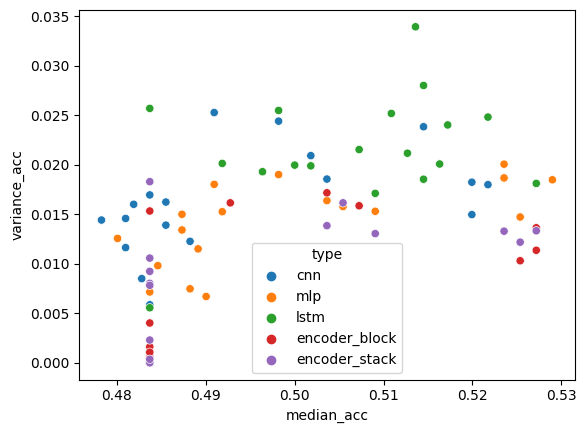

In [183]:
import seaborn as sns
sns.scatterplot(data=only_stats, x="median_acc", y="variance_acc", hue="type")

In [184]:
only_stats.groupby(['ignored_percent','type'])[['median_acc']].median()

median_acc
ignored_percent type                     
0               cnn              0.501812
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm             0.514493
                mlp              0.523551
1               cnn              0.485507
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm             0.501812
                mlp              0.491848
3               cnn              0.490942
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm             0.513587
                mlp              0.503623
5               cnn              0.485507
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm             0.500000
                mlp              0.490942
8               cnn              0.483696
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm             0.509058
                mlp              0.489130
13              cnn              0.481884
                encoder_block    0.483696
                encoder_stack    0.483696
                lstm             0.496377
                mlp              0.483696

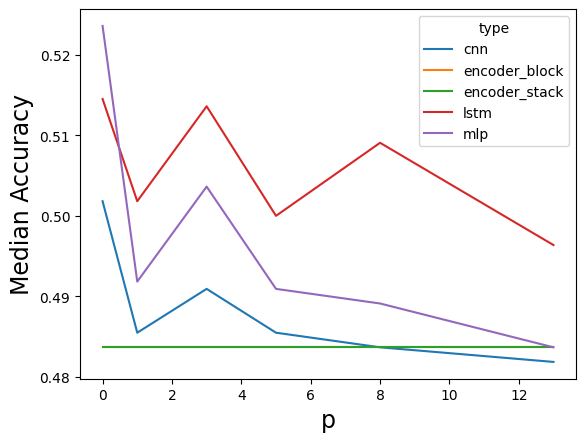

In [185]:
sns.lineplot(only_stats.groupby(by=['type','ignored_percent'])[['median_acc','variance_acc']].median().reset_index(),x='ignored_percent',y='median_acc',hue='type')
plt.ylabel('Median Accuracy',fontsize=17)
plt.xlabel('p',fontsize=17)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r'../documents/figures/p_effect_on_models.png')

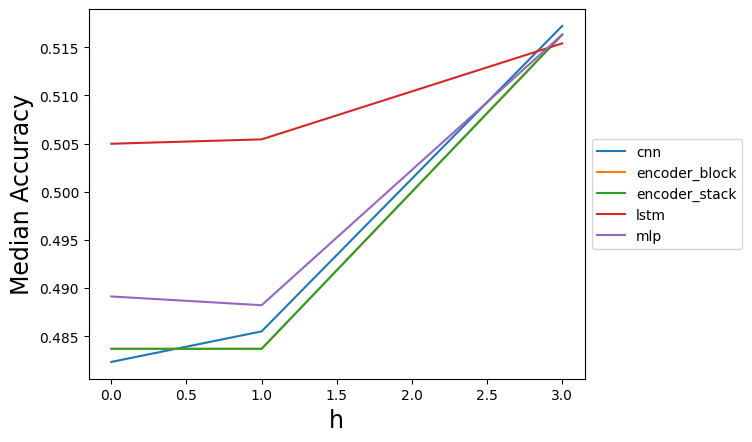

In [186]:
sns.lineplot(only_stats.groupby(by=['type','halflife'])[['median_acc','variance_acc']].median().reset_index(),x='halflife',y='median_acc',hue='type')
plt.ylabel('Median Accuracy',fontsize=17)
plt.xlabel('h',fontsize=17)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(r'../documents/figures/h_effect_on_models.png')

In [187]:
only_stats.groupby(by=['type','ignored_percent'])[['median_acc','variance_acc']].median()

median_acc  variance_acc
type          ignored_percent                          
cnn           0                  0.501812  1.496057e-02
              1                  0.485507  1.622768e-02
              3                  0.490942  1.823152e-02
              5                  0.485507  1.457067e-02
              8                  0.483696  1.694723e-02
              13                 0.481884  1.600059e-02
encoder_block 0                  0.483696  1.362935e-02
              1                  0.483696  1.610588e-03
              3                  0.483696  4.017657e-03
              5                  0.483696  5.551115e-17
              8                  0.483696  1.064996e-03
              13                 0.483696  7.246377e-04
encoder_stack 0                  0.483696  1.328757e-02
              1                  0.483696  7.819374e-03
              3                  0.483696  9.229961e-03
              5                  0.483696  2.296084e-03
              8                  0.483696  1.056928e-02
              13                 0.483696  8.022315e-03
lstm          0                  0.514493  2.517258e-02
              1                  0.501812  1.988256e-02
              3                  0.513587  2.480590e-02
              5                  0.500000  1.995716e-02
              8                  0.509058  1.810869e-02
              13                 0.496377  2.006919e-02
mlp           0                  0.523551  1.471746e-02
              1                  0.491848  1.525293e-02
              3                  0.503623  1.637264e-02
              5                  0.490942  1.801512e-02
              8                  0.489130  1.149961e-02
              13                 0.483696  1.255632e-02

In [188]:
only_stats['ignored_percent'].value_counts()

13    15
8     15
5     15
3     15
1     15
0     15
Name: ignored_percent, dtype: int64

In [189]:
only_stats.groupby(['halflife','type'])[['median_acc']].median()

median_acc
halflife type                     
0        cnn              0.482337
         encoder_block    0.483696
         encoder_stack    0.483696
         lstm             0.504982
         mlp              0.489130
1        cnn              0.485507
         encoder_block    0.483696
         encoder_stack    0.483696
         lstm             0.505435
         mlp              0.488225
3        cnn              0.517210
         encoder_block    0.516304
         encoder_stack    0.516304
         lstm             0.515399
         mlp              0.516304

<AxesSubplot:xlabel='halflife', ylabel='median_acc'>

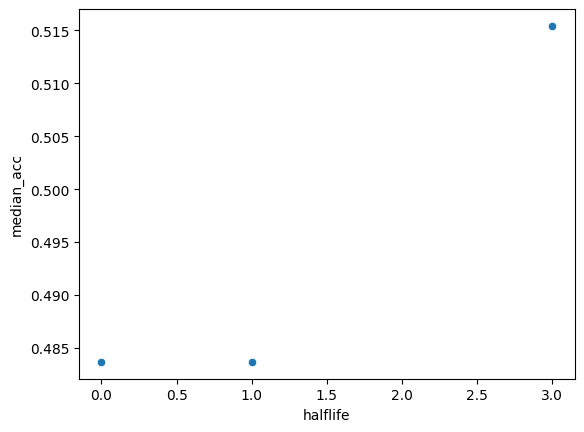

In [190]:
sns.scatterplot(only_stats.groupby('halflife')[['median_acc','variance_acc']].median().reset_index(),x='halflife',y='median_acc')

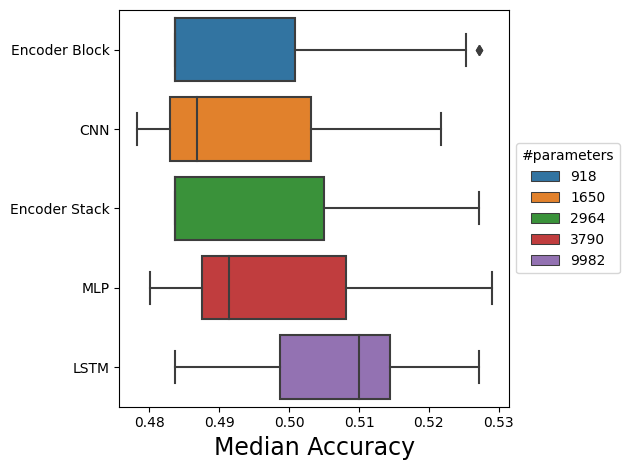

In [191]:
import matplotlib.pyplot as plt
g = sns.boxplot(data=only_stats.replace({'cnn':'CNN','encoder_block' : 'Encoder Block','encoder_stack' : 'Encoder Stack','mlp' : 'MLP','lstm':'LSTM'}).sort_values('params'), x="median_acc", y="type",hue='params',dodge=False)

plt.ylabel('')
plt.xlabel('Median Accuracy',fontsize=17)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g.get_legend().set_title("#parameters")
plt.tight_layout()
plt.savefig('../documents/figures/global_accs.png')

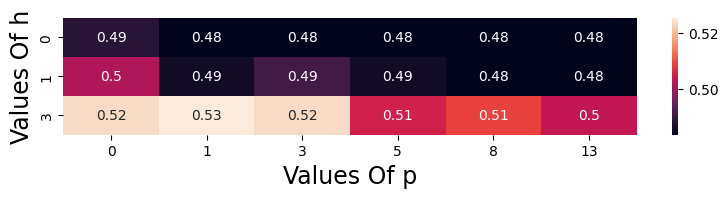

In [199]:
tmp = only_stats.groupby(['halflife','ignored_percent'])[['median_acc']].median()
tmp=tmp.reset_index().pivot('halflife','ignored_percent','median_acc')

fig,ax=plt.subplots(1,1,figsize=(8,2))
sns.heatmap(tmp,annot=True)
plt.ylabel("Values Of h",fontsize=17)
plt.xlabel("Values Of p",fontsize=17)
plt.tight_layout()
plt.savefig('../documents/figures/p_vs_h.png')

In [194]:
from sklearn.metrics import roc_auc_score

def create_auc_column(row):

    trues = row['true']
    preds = row['predictions']

    aucs = []
    for pred in preds:
        sc = roc_auc_score(trues,pred)
        aucs.append(sc)
    return np.median(aucs)
only_stats['aucs'] = df.apply(lambda row : create_auc_column(row),axis=1)
only_stats.head()

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc,aucs
0,cnn,0,0,"[0.4963768115942029, 0.4782608695652174, 0.463...",1650,0.488225,0.012261,0.482226
1,cnn,0,1,"[0.5, 0.483695652173913, 0.48007246376811596, ...",1650,0.483696,0.005856,0.491780
2,cnn,0,13,"[0.4945652173913043, 0.45108695652173914, 0.48...",1650,0.481884,0.016001,0.482791
3,cnn,0,3,"[0.4945652173913043, 0.48188405797101447, 0.46...",1650,0.482790,0.008497,0.483448
4,cnn,0,5,"[0.463768115942029, 0.483695652173913, 0.44746...",1650,0.480978,0.014571,0.489467


In [195]:
only_stats.groupby('type')[['aucs']].median().sort_values('aucs')

,aucs
type,
encoder_block,0.477236
cnn,0.491333
encoder_stack,0.512243
mlp,0.514337
lstm,0.520770


In [196]:
encoders = only_stats[only_stats['type'].str.contains('encoder')].copy().reset_index(drop=True)
encoders

,type,halflife,ignored_percent,accuracies,params,median_acc,variance_acc,aucs
0,encoder_block,0,0,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,5.551115e-17,0.484808
1,encoder_block,0,1,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,1.086957e-03,0.485393
2,encoder_block,0,13,"[0.48188405797101447, 0.483695652173913, 0.483...",918,0.483696,7.246377e-04,0.477988
3,encoder_block,0,3,"[0.483695652173913, 0.483695652173913, 0.48007...",918,0.483696,1.086957e-03,0.469249
4,encoder_block,0,5,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,5.551115e-17,0.470005
5,encoder_block,0,8,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,5.434783e-04,0.466246
6,encoder_block,1,0,"[0.483695652173913, 0.5054347826086957, 0.4836...",918,0.483696,1.532330e-02,0.462856
7,encoder_block,1,1,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,1.610588e-03,0.475931
8,encoder_block,1,13,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,5.551115e-17,0.466364
9,encoder_block,1,3,"[0.483695652173913, 0.483695652173913, 0.48369...",918,0.483696,4.017657e-03,0.470379


In [197]:
stack = encoders[encoders['type'].str.contains('stack')][['halflife','ignored_percent','accuracies','type']]
block = encoders[encoders['type'].str.contains('block')][['halflife','ignored_percent','accuracies','type']]
encoder_merge = pd.merge(stack,block,on=['halflife','ignored_percent'],how='inner',suffixes=('_stack','_block'))
encoder_merge

,halflife,ignored_percent,accuracies_stack,type_stack,accuracies_block,type_block
0,0,0,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block
1,0,1,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block
2,0,13,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.48188405797101447, 0.483695652173913, 0.483...",encoder_block
3,0,3,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48007...",encoder_block
4,0,5,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block
5,0,8,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block
6,1,0,"[0.483695652173913, 0.483695652173913, 0.51630...",encoder_stack,"[0.483695652173913, 0.5054347826086957, 0.4836...",encoder_block
7,1,1,"[0.483695652173913, 0.4855072463768116, 0.4836...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block
8,1,13,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block
9,1,3,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block


In [198]:
from scipy.stats import ks_2samp

encoder_merge['ks_0'] = encoder_merge.apply(lambda row : ks_2samp(row['accuracies_stack'],row['accuracies_block'])[0],axis=1)
encoder_merge['ks_1'] = encoder_merge.apply(lambda row : ks_2samp(row['accuracies_stack'],row['accuracies_block'])[1],axis=1)
encoder_merge

,halflife,ignored_percent,accuracies_stack,type_stack,accuracies_block,type_block,ks_0,ks_1
0,0,0,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.00,1.000000
1,0,1,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.10,1.000000
2,0,13,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.48188405797101447, 0.483695652173913, 0.483...",encoder_block,0.30,0.786930
3,0,3,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48007...",encoder_block,0.10,1.000000
4,0,5,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.00,1.000000
5,0,8,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.10,1.000000
6,1,0,"[0.483695652173913, 0.483695652173913, 0.51630...",encoder_stack,"[0.483695652173913, 0.5054347826086957, 0.4836...",encoder_block,0.28,0.285042
7,1,1,"[0.483695652173913, 0.4855072463768116, 0.4836...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.16,0.914993
8,1,13,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.04,1.000000
9,1,3,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_stack,"[0.483695652173913, 0.483695652173913, 0.48369...",encoder_block,0.24,0.475454
